<a href="https://colab.research.google.com/github/Ebubechukwu579/Lagos-Rainfall-Precipitation-Model-Visualization/blob/main/Precipitation_Form_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [76]:
# Load the Dataset and display the Dataframe
lagos_RFData = pd.read_csv('/content/lagos_all_years.csv')
lagos_RFData.head(5)

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin
0,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,...,NaN,2002-01-01T06:57:21,2002-01-01T18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,...,NaN,2002-01-02T06:57:46,2002-01-02T18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
2,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,...,NaN,2002-01-03T06:58:11,2002-01-03T18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN
3,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,...,NaN,2002-01-04T06:58:35,2002-01-04T18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
4,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,...,NaN,2002-01-05T06:58:59,2002-01-05T18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [77]:
# Drop Irrelevant Columns
irrelevant_columns = [
    'tempmax','tempmin','feelslikemax','feelslikemin','feelslike','snow','snowdepth','windgust','solarradiation','solarenergy','uvindex','severerisk','sunrise','sunset','description','icon','stations','precipprob','precipcover','conditions','windspeedmax','windspeedmin'
]

# Drop the columns
Cleaned_RFData = lagos_RFData.drop(columns=irrelevant_columns, errors='ignore')

In [78]:
# Display The Final Dataframe Column
Cleaned_RFData.head(10)

,datetime,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,2002-01-01,27.2,25.2,88.7,0.0,NaN,16.6,279.9,1010.9,90.0,6.5,0.57
1,2002-01-02,29.0,25.1,80.5,0.0,NaN,18.4,11.0,1011.2,90.0,8.4,0.61
2,2002-01-03,29.1,23.2,74.6,0.0,NaN,18.4,218.6,1011.7,90.0,4.9,0.64
3,2002-01-04,33.1,24.1,59.3,0.0,NaN,14.8,170.0,1010.2,90.0,8.0,0.68
4,2002-01-05,28.3,25.4,85.0,0.0,NaN,20.5,193.4,1010.0,90.0,5.3,0.71
5,2002-01-06,27.2,24.6,86.5,1.5,rain,22.3,179.1,1010.2,90.0,8.0,0.75
6,2002-01-07,27.0,23.3,81.4,0.0,NaN,18.4,337.9,1009.4,90.0,7.1,0.78
7,2002-01-08,28.2,24.9,82.6,0.0,NaN,14.8,152.6,1010.1,90.0,5.8,0.82
8,2002-01-09,27.7,15.0,47.5,0.0,NaN,24.1,29.3,1011.0,90.0,1.0,0.85
9,2002-01-10,24.7,13.5,50.9,0.0,NaN,24.1,317.7,1012.1,90.0,1.0,0.89


In [79]:
# Check the nature of the values in the Final Dataframe
Cleaned_RFData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          7125 non-null   object 
 1   temp              7853 non-null   float64
 2   dew               7853 non-null   float64
 3   humidity          7853 non-null   float64
 4   precip            7853 non-null   float64
 5   preciptype        3736 non-null   object 
 6   windspeed         8078 non-null   float64
 7   winddir           7470 non-null   float64
 8   sealevelpressure  7664 non-null   float64
 9   cloudcover        7853 non-null   float64
 10  visibility        7651 non-null   float64
 11  moonphase         8310 non-null   float64
dtypes: float64(10), object(2)
memory usage: 813.5+ KB


In [44]:
# Check for number of Rows and Columns
Cleaned_RFData.shape

(8676, 12)

In [80]:
# Check for empty cells in the dataframe
Cleaned_RFData.isnull().sum()

,0
datetime,1551
temp,823
dew,823
humidity,823
precip,823
preciptype,4940
windspeed,598
winddir,1206
sealevelpressure,1012
cloudcover,823


In [81]:
# Replace empty categorical Rows with 0 and numerical rows with the mean
categorical_cols = Cleaned_RFData.select_dtypes(include=['object']).columns
for col in categorical_cols:
    Cleaned_RFData[col].fillna(0, inplace=True)

<ipython-input-81-d4b33de983b9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cleaned_RFData[col].fillna(0, inplace=True)


In [82]:
# Drop empty rows in the Dataframe
Cleaned_RFData = Cleaned_RFData.dropna()
Cleaned_RFData.isnull().sum()

,0
datetime,0
temp,0
dew,0
humidity,0
precip,0
preciptype,0
windspeed,0
winddir,0
sealevelpressure,0
cloudcover,0


In [83]:
# Display the Dataframe
Cleaned_RFData.head(5)

,datetime,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,2002-01-01,27.2,25.2,88.7,0.0,0,16.6,279.9,1010.9,90.0,6.5,0.57
1,2002-01-02,29.0,25.1,80.5,0.0,0,18.4,11.0,1011.2,90.0,8.4,0.61
2,2002-01-03,29.1,23.2,74.6,0.0,0,18.4,218.6,1011.7,90.0,4.9,0.64
3,2002-01-04,33.1,24.1,59.3,0.0,0,14.8,170.0,1010.2,90.0,8.0,0.68
4,2002-01-05,28.3,25.4,85.0,0.0,0,20.5,193.4,1010.0,90.0,5.3,0.71


In [84]:
# Check for number of Rows and Columns
Cleaned_RFData.shape

(7161, 12)

In [85]:
# Check for the rows in the Date column that do not match this format (YYYY-MM-DD)
invalid_entries = Cleaned_RFData[Cleaned_RFData['datetime'].astype(str).str.match(r'\d{4}-\d{2}-\d{2}') == False]
print(invalid_entries)

     datetime  temp   dew  humidity  precip preciptype  windspeed  winddir  \
4018        0  26.5  20.2      71.1     0.0          0       24.1     53.6   
4019        0  26.5  17.3      59.9     0.0          0       22.3     70.1   
4020        0  26.7  18.4      63.8     0.0          0       18.4    292.6   
4021        0  26.6  19.9      67.4     0.0          0       16.6    267.1   
4022        0  26.0  18.6      65.0     0.0          0       16.6    322.6   
...       ...   ...   ...       ...     ...        ...        ...      ...   
8121        0  30.6  26.3      78.8     0.0          0       24.1    216.3   
8122        0  30.9  26.5      77.9     0.0          0       25.9    212.6   
8123        0  30.7  27.0      81.0     0.6       rain       24.1    221.8   
8124        0  31.1  26.0      75.5     0.5       rain       29.5    218.4   
8125        0  30.9  26.1      76.8     3.9       rain       24.1    207.3   

      sealevelpressure  cloudcover  visibility  moonphase  
401

In [86]:
# Ensure conversion of datetime and check for datatype
Cleaned_RFData['datetime'] = pd.to_datetime(Cleaned_RFData['datetime'], errors='coerce')
print(Cleaned_RFData['datetime'].dtype)

datetime64[ns]


In [87]:
# Check for invalid rows formats
invalid_entries = Cleaned_RFData[Cleaned_RFData['datetime'].astype(str).str.match(r'\d{4}-\d{2}-\d{2}') == False]
print(invalid_entries)

     datetime  temp   dew  humidity  precip preciptype  windspeed  winddir  \
4018      NaT  26.5  20.2      71.1     0.0          0       24.1     53.6   
4019      NaT  26.5  17.3      59.9     0.0          0       22.3     70.1   
4020      NaT  26.7  18.4      63.8     0.0          0       18.4    292.6   
4021      NaT  26.6  19.9      67.4     0.0          0       16.6    267.1   
4022      NaT  26.0  18.6      65.0     0.0          0       16.6    322.6   
...       ...   ...   ...       ...     ...        ...        ...      ...   
8121      NaT  30.6  26.3      78.8     0.0          0       24.1    216.3   
8122      NaT  30.9  26.5      77.9     0.0          0       25.9    212.6   
8123      NaT  30.7  27.0      81.0     0.6       rain       24.1    221.8   
8124      NaT  31.1  26.0      75.5     0.5       rain       29.5    218.4   
8125      NaT  30.9  26.1      76.8     3.9       rain       24.1    207.3   

      sealevelpressure  cloudcover  visibility  moonphase  
401

In [89]:
# Drop rows that are not of the same type and then create Month and MonthName columns from the datetime column
Cleaned_RFData = Cleaned_RFData.dropna(subset=['datetime'])
Cleaned_RFData['datetime'] = pd.to_datetime(Cleaned_RFData['datetime'], errors='coerce')
Cleaned_RFData['Month'] = Cleaned_RFData['datetime'].dt.month
Cleaned_RFData['MonthName'] = Cleaned_RFData['datetime'].dt.month_name()
Cleaned_RFData.head(5)

,datetime,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Month,MonthName
0,2002-01-01,27.2,25.2,88.7,0.0,0,16.6,279.9,1010.9,90.0,6.5,0.57,1,January
1,2002-01-02,29.0,25.1,80.5,0.0,0,18.4,11.0,1011.2,90.0,8.4,0.61,1,January
2,2002-01-03,29.1,23.2,74.6,0.0,0,18.4,218.6,1011.7,90.0,4.9,0.64,1,January
3,2002-01-04,33.1,24.1,59.3,0.0,0,14.8,170.0,1010.2,90.0,8.0,0.68,1,January
4,2002-01-05,28.3,25.4,85.0,0.0,0,20.5,193.4,1010.0,90.0,5.3,0.71,1,January


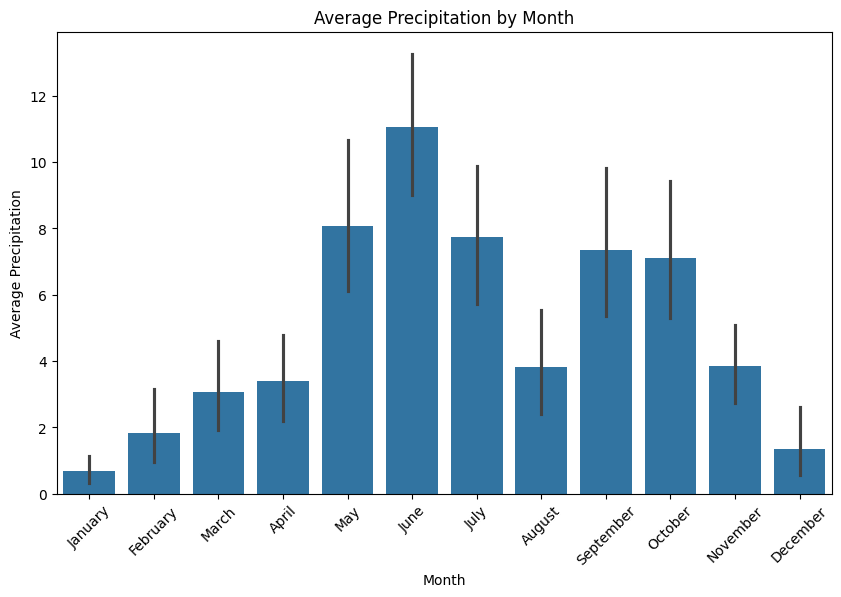

In [90]:
# Perform Visualization Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='MonthName', y='precip', data=Cleaned_RFData)
plt.title('Average Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.xticks(rotation=45)
plt.show()

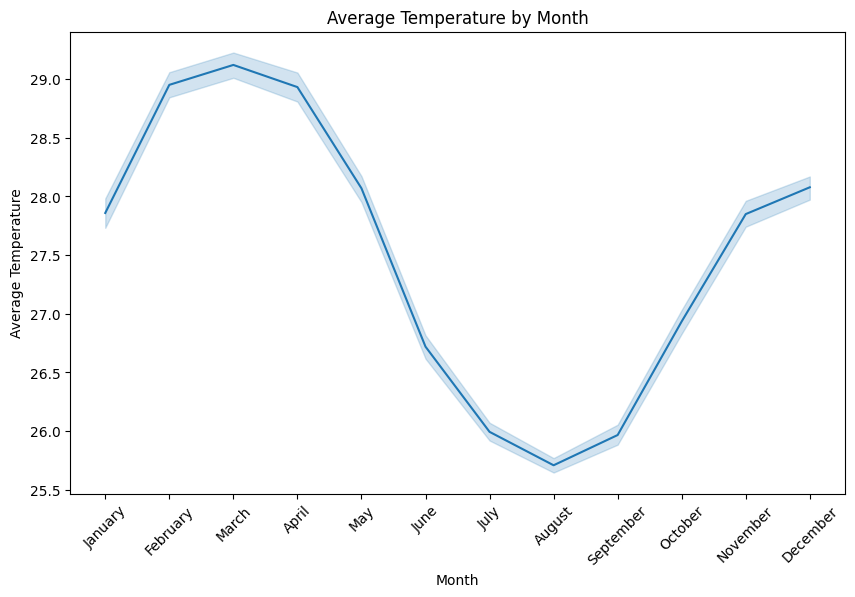

In [92]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthName', y='temp', data=Cleaned_RFData)
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()

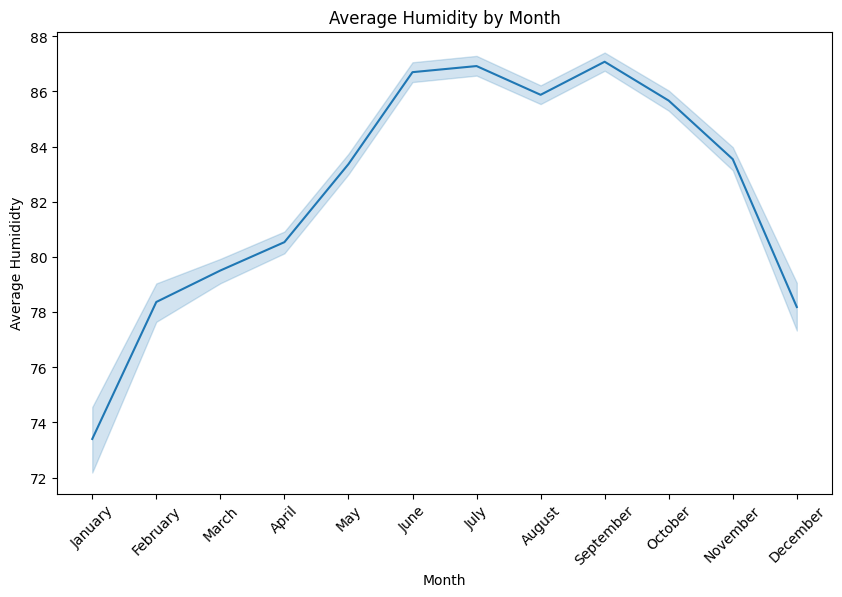

In [93]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthName', y='humidity', data=Cleaned_RFData)
plt.title('Average Humidity by Month')
plt.xlabel('Month')
plt.ylabel('Average Humididty')
plt.xticks(rotation=45)
plt.show()

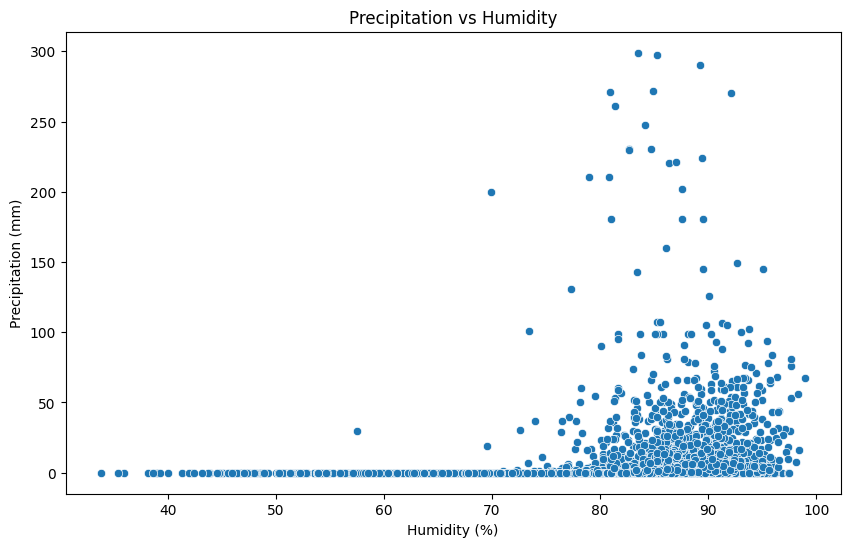

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='precip', data=Cleaned_RFData)
plt.title('Precipitation vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Precipitation (mm)')
plt.show()

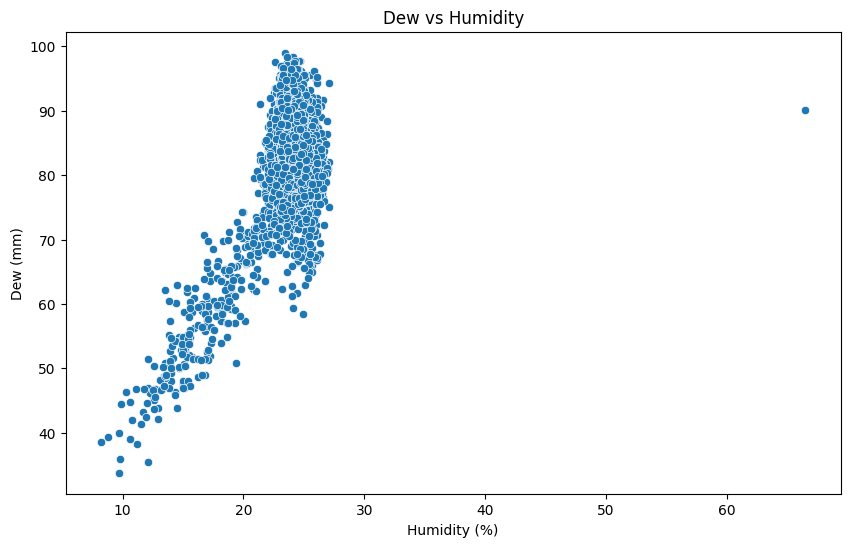

In [95]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dew', y='humidity', data=Cleaned_RFData)
plt.title('Dew vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Dew (mm)')
plt.show()

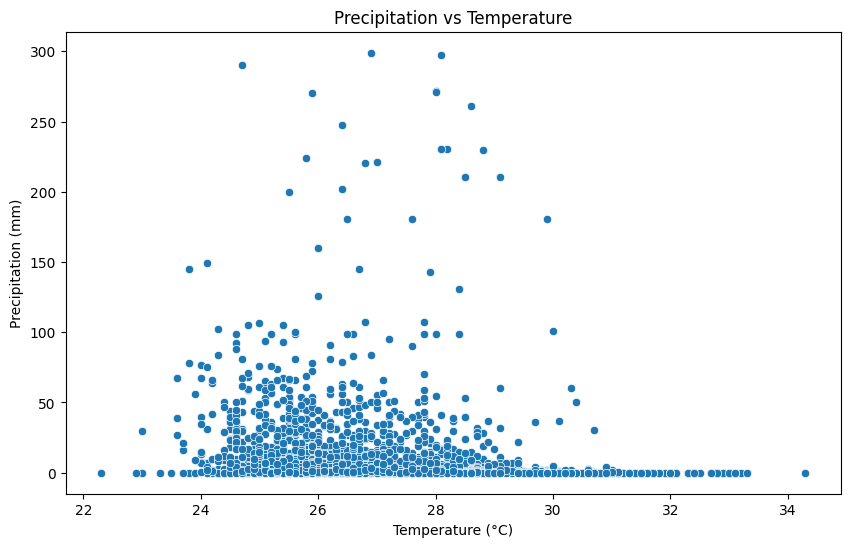

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='precip', data=Cleaned_RFData)
plt.title('Precipitation vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()

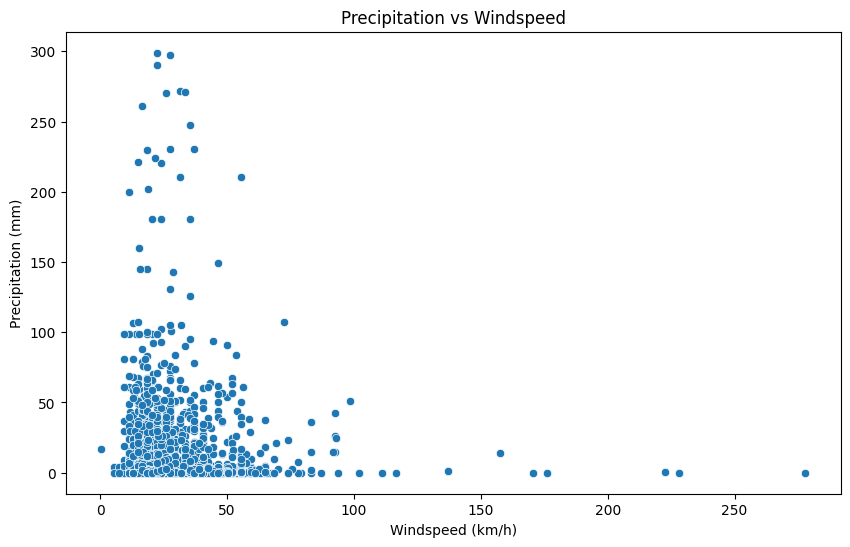

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='precip', data=Cleaned_RFData)
plt.title('Precipitation vs Windspeed')
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Precipitation (mm)')
plt.show()

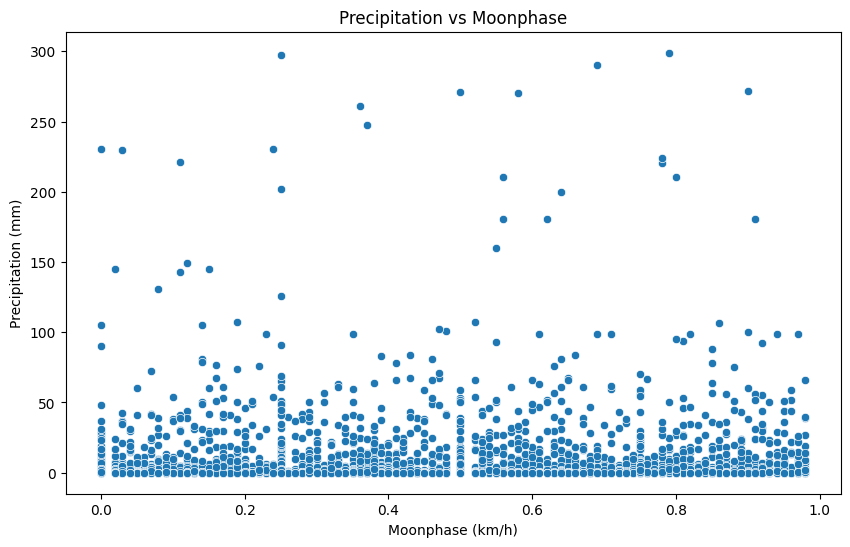

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='moonphase', y='precip', data=Cleaned_RFData)
plt.title('Precipitation vs Moonphase')
plt.xlabel('Moonphase (km/h)')
plt.ylabel('Precipitation (mm)')
plt.show()

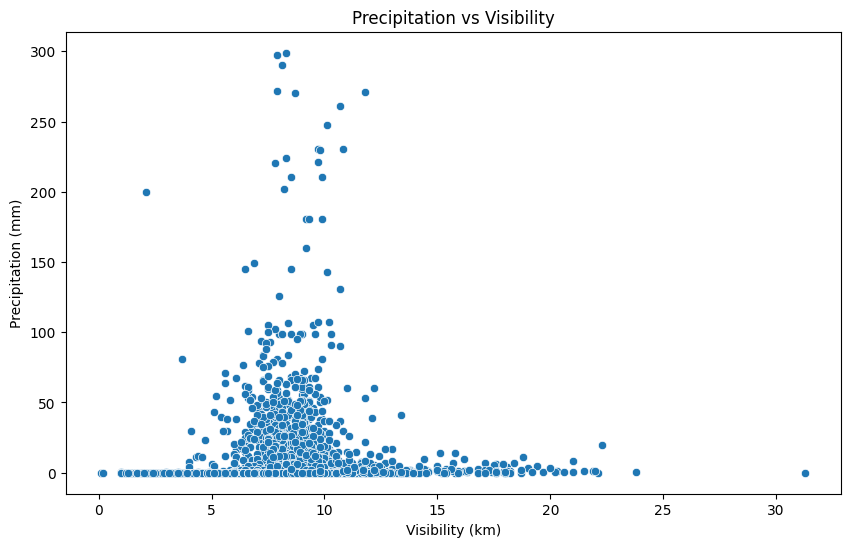

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visibility', y='precip', data=Cleaned_RFData)
plt.title('Precipitation vs Visibility')
plt.xlabel('Visibility (km)')
plt.ylabel('Precipitation (mm)')
plt.show()

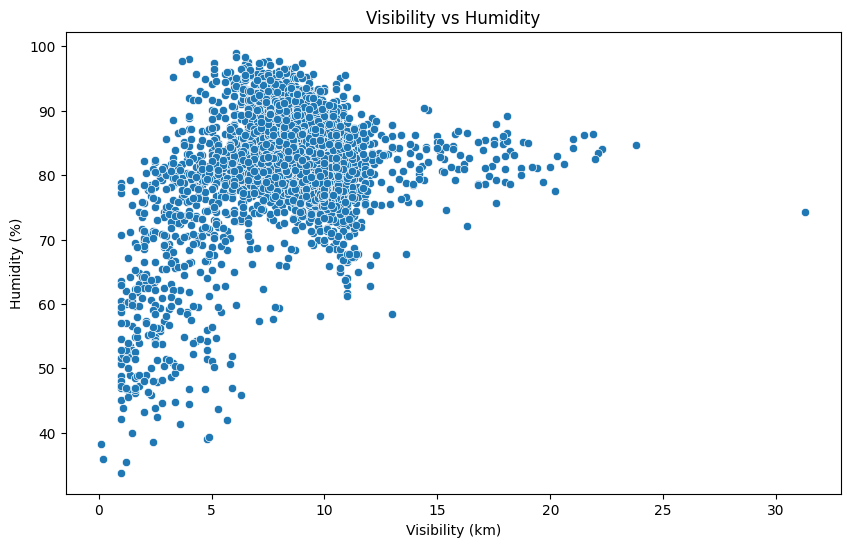

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='visibility', y='humidity', data=Cleaned_RFData)
plt.title('Visibility vs Humidity')
plt.xlabel('Visibility (km)')
plt.ylabel('Humidity (%)')
plt.show()

In [101]:
Cleaned_RFData = Cleaned_RFData.drop(columns=['MonthName'])
Cleaned_RFData = Cleaned_RFData.drop(columns=['datetime'])
Cleaned_RFData.head(5)

,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Month
0,27.2,25.2,88.7,0.0,0,16.6,279.9,1010.9,90.0,6.5,0.57,1
1,29.0,25.1,80.5,0.0,0,18.4,11.0,1011.2,90.0,8.4,0.61,1
2,29.1,23.2,74.6,0.0,0,18.4,218.6,1011.7,90.0,4.9,0.64,1
3,33.1,24.1,59.3,0.0,0,14.8,170.0,1010.2,90.0,8.0,0.68,1
4,28.3,25.4,85.0,0.0,0,20.5,193.4,1010.0,90.0,5.3,0.71,1


In [102]:
for column in Cleaned_RFData.select_dtypes(include=['object']):
    encoder = LabelEncoder()
    Cleaned_RFData[column] = encoder.fit_transform(Cleaned_RFData[column].astype(str))
    Cleaned_RFData[column] = Cleaned_RFData[column].astype(int)
Cleaned_RFData.head(5)


,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Month
0,27.2,25.2,88.7,0.0,0,16.6,279.9,1010.9,90.0,6.5,0.57,1
1,29.0,25.1,80.5,0.0,0,18.4,11.0,1011.2,90.0,8.4,0.61,1
2,29.1,23.2,74.6,0.0,0,18.4,218.6,1011.7,90.0,4.9,0.64,1
3,33.1,24.1,59.3,0.0,0,14.8,170.0,1010.2,90.0,8.0,0.68,1
4,28.3,25.4,85.0,0.0,0,20.5,193.4,1010.0,90.0,5.3,0.71,1


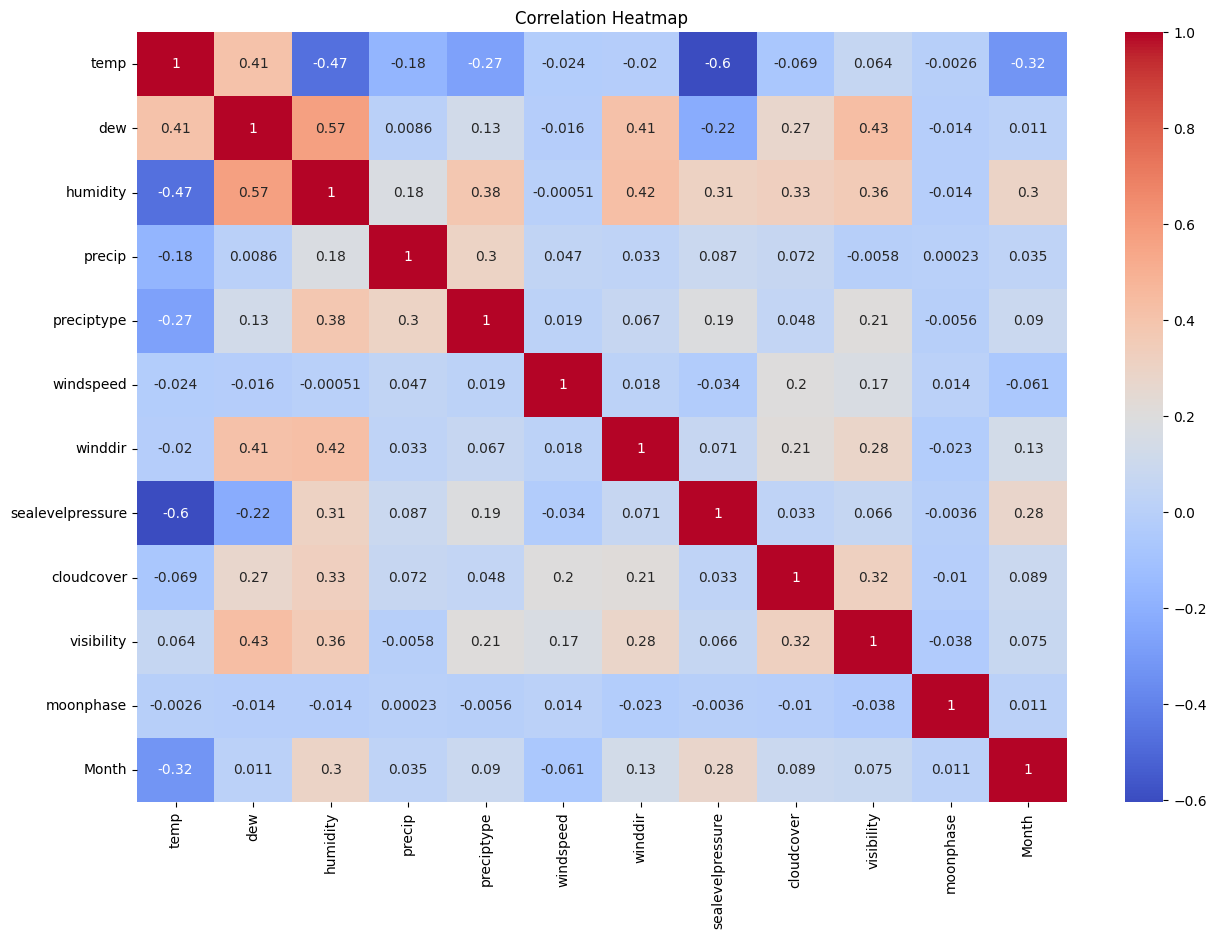

In [103]:
# Perform Correlation Analysis
correlation_matrix = Cleaned_RFData.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()